In [4]:
#imporitng plotting packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')



 # Read the data

In [5]:
#Read the csv data into a dataframe
df = pd.read_csv("day.csv")



In [6]:
#View sample data
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [7]:
#View the data type of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [8]:
#View statistical inforamtion
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [9]:
#View shape of dataframe
print(df.shape)

(730, 16)


# Null Check

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


There are no null values in the data.

# Duplicates check

In [11]:
df_test = df.copy()

# Check for duplicates. Remove duplicate row if any
df_test.drop_duplicates(subset=None, inplace=True)

In [12]:
#check the shape of duplicate dataframe created
df_test.shape

(730, 16)

Shapr of orginal data frame and test data frame is same . It means there are no duplivcates 

# Data Cleaning 

In [13]:
#Get the names of columns
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [14]:
#Check the value counts of the dataframe
df.value_counts(ascending=True).head(10)

instant  dteday      season  yr  mnth  holiday  weekday  workingday  weathersit  temp       atemp     hum      windspeed  casual  registered  cnt 
1        01-01-2018  1       0   1     0        1        1           2           14.110847  18.18125  80.5833  10.749882  331     654         985     1
482      27-04-2019  2       1   4     0        6        0           1           18.757500  22.63185  40.0833  23.291411  1014    5219        6233    1
483      28-04-2019  2       1   4     0        0        0           2           15.443347  18.87520  48.9583  8.708325   1120    3100        4220    1
484      29-04-2019  2       1   4     0        1        1           1           18.791653  22.50605  58.7083  7.832836   2229    4075        6304    1
485      30-04-2019  2       1   4     0        2        1           2           19.030847  22.88480  57.0000  11.499746  665     4907        5572    1
486      01-05-2019  2       1   5     0        3        1           2           25.146653  2

' instant', 'dteday','casual', 'registered' has no value add to our assgnment becauste thes having indexes and dates values. So we can drop these columns.

In [15]:
# Dropping instant', 'dteday','casual', 'registered' columns
df.drop(['instant'],axis=1,inplace=True)
df.drop(['dteday'],axis=1,inplace=True)
df.drop(['casual'],axis=1,inplace=True)
df.drop(['registered'],axis=1,inplace=True)

In [16]:
#Check the shape of new dataframe
df.shape

(730, 12)

# Correlation of data

In [17]:
df.corr()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
season,1.000000e+00,-3.279074e-16,8.310321e-01,-0.010868,0.004012,0.017868,0.021306,0.333361,0.342014,0.208220,-0.229607,0.404584
yr,-3.279074e-16,1.000000e+00,-5.162656e-16,0.008195,0.000685,-0.011852,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.569728
mnth,8.310321e-01,-5.162656e-16,1.000000e+00,0.018905,-0.004059,-0.010414,0.045613,0.219083,0.226430,0.224937,-0.208013,0.278191
holiday,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.020145,-0.257009,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,-0.068764
weekday,4.012478e-03,6.852851e-04,-4.059002e-03,-0.020145,1.000000,0.001588,0.034216,0.044876,0.037964,0.008780,-0.017230,0.036183
workingday,1.786841e-02,-1.185197e-02,-1.041372e-02,-0.257009,0.001588,1.000000,-0.026332,0.002044,0.010657,0.053770,-0.002453,-0.027640
weathersit,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.034216,-0.026332,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.295929
temp,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,0.044876,0.002044,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,0.037964,0.010657,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,2.082196e-01,-1.125471e-01,2.249368e-01,-0.015662,0.008780,0.053770,0.590277,0.128565,0.141512,1.000000,-0.248506,-0.098543


The total bike rentals (featurescnt) show a positive correlation with both (temp) and (atemp). Conversely, there is a negative correlation between bike rentals and both windspeed and humidity (hum).

# Check Unique values

In [18]:
#check unique values present in data
df.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

# Convert intergers to Catogories

In [19]:
# Convert Feature 'weathersit' from integer to categorical
df.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace = True)
df['weathersit'].value_counts()

weathersit
good        463
moderate    246
bad          21
Name: count, dtype: int64

In [20]:
# Convert 'weekday' to object 
df.weekday = df.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})
df['weekday'].unique()

array(['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun'], dtype=object)

In [21]:
# Convert feature 'mnth' to categorical
df.mnth = df.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})
df['mnth'].unique()

array(['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sept',
       'oct', 'nov', 'dec'], dtype=object)

In [22]:
# Convert 'season' feature to categorical
df.season.replace({1:"spring",2:"summer",3:"fall",4:"winter"},inplace = True)
df['season'].value_counts()

season
fall      188
summer    184
spring    180
winter    178
Name: count, dtype: int64

In [23]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,mon,1,moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,good,9.305237,11.46350,43.6957,12.522300,1600


# Data Visualization

<Figure size 2000x1500 with 0 Axes>

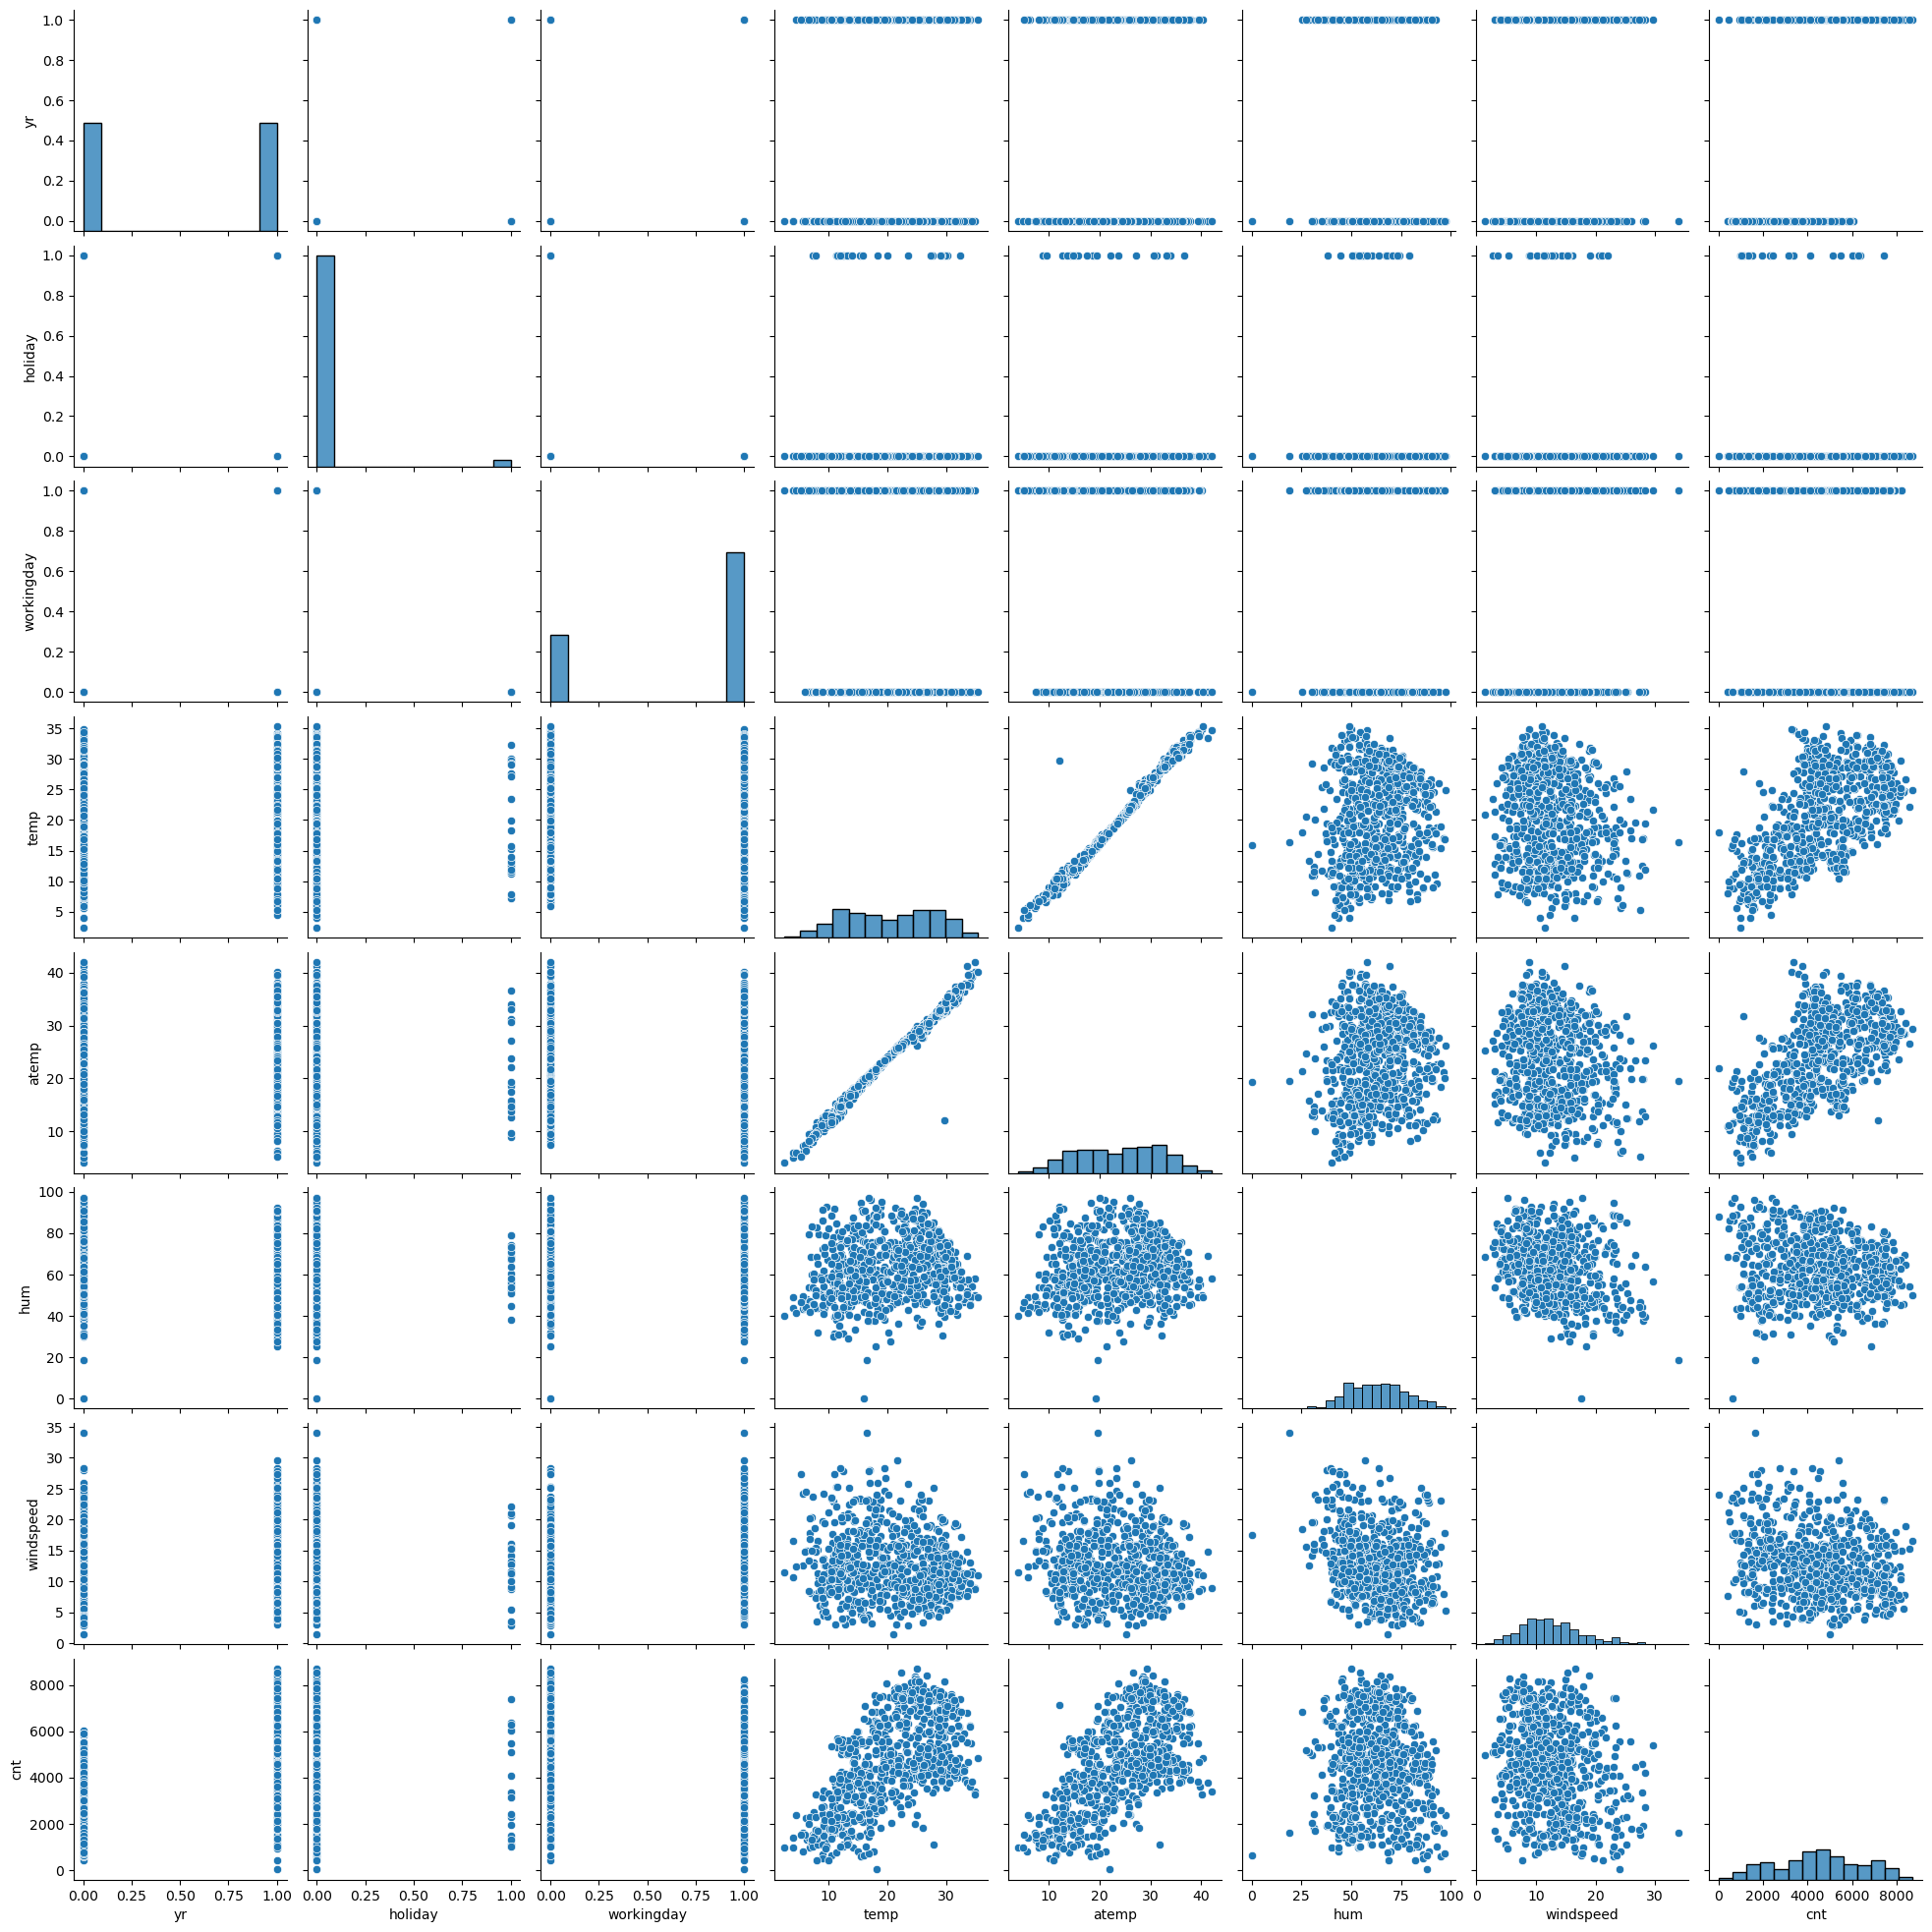

In [24]:
plt.figure(figsize = (20,15))
sns.pairplot(df)
plt.show()

The data shows that 50% of daily bike usage records are categorized under 'Yr'. Bike usage is higher on non-holidays compared to holidays. Additionally, there is a noticeable increase in bike demand on working days, indicating that commuters rely on bikes for their daily transportation needs, likely due to convenience and efficiency in urban environments

# Heat Map

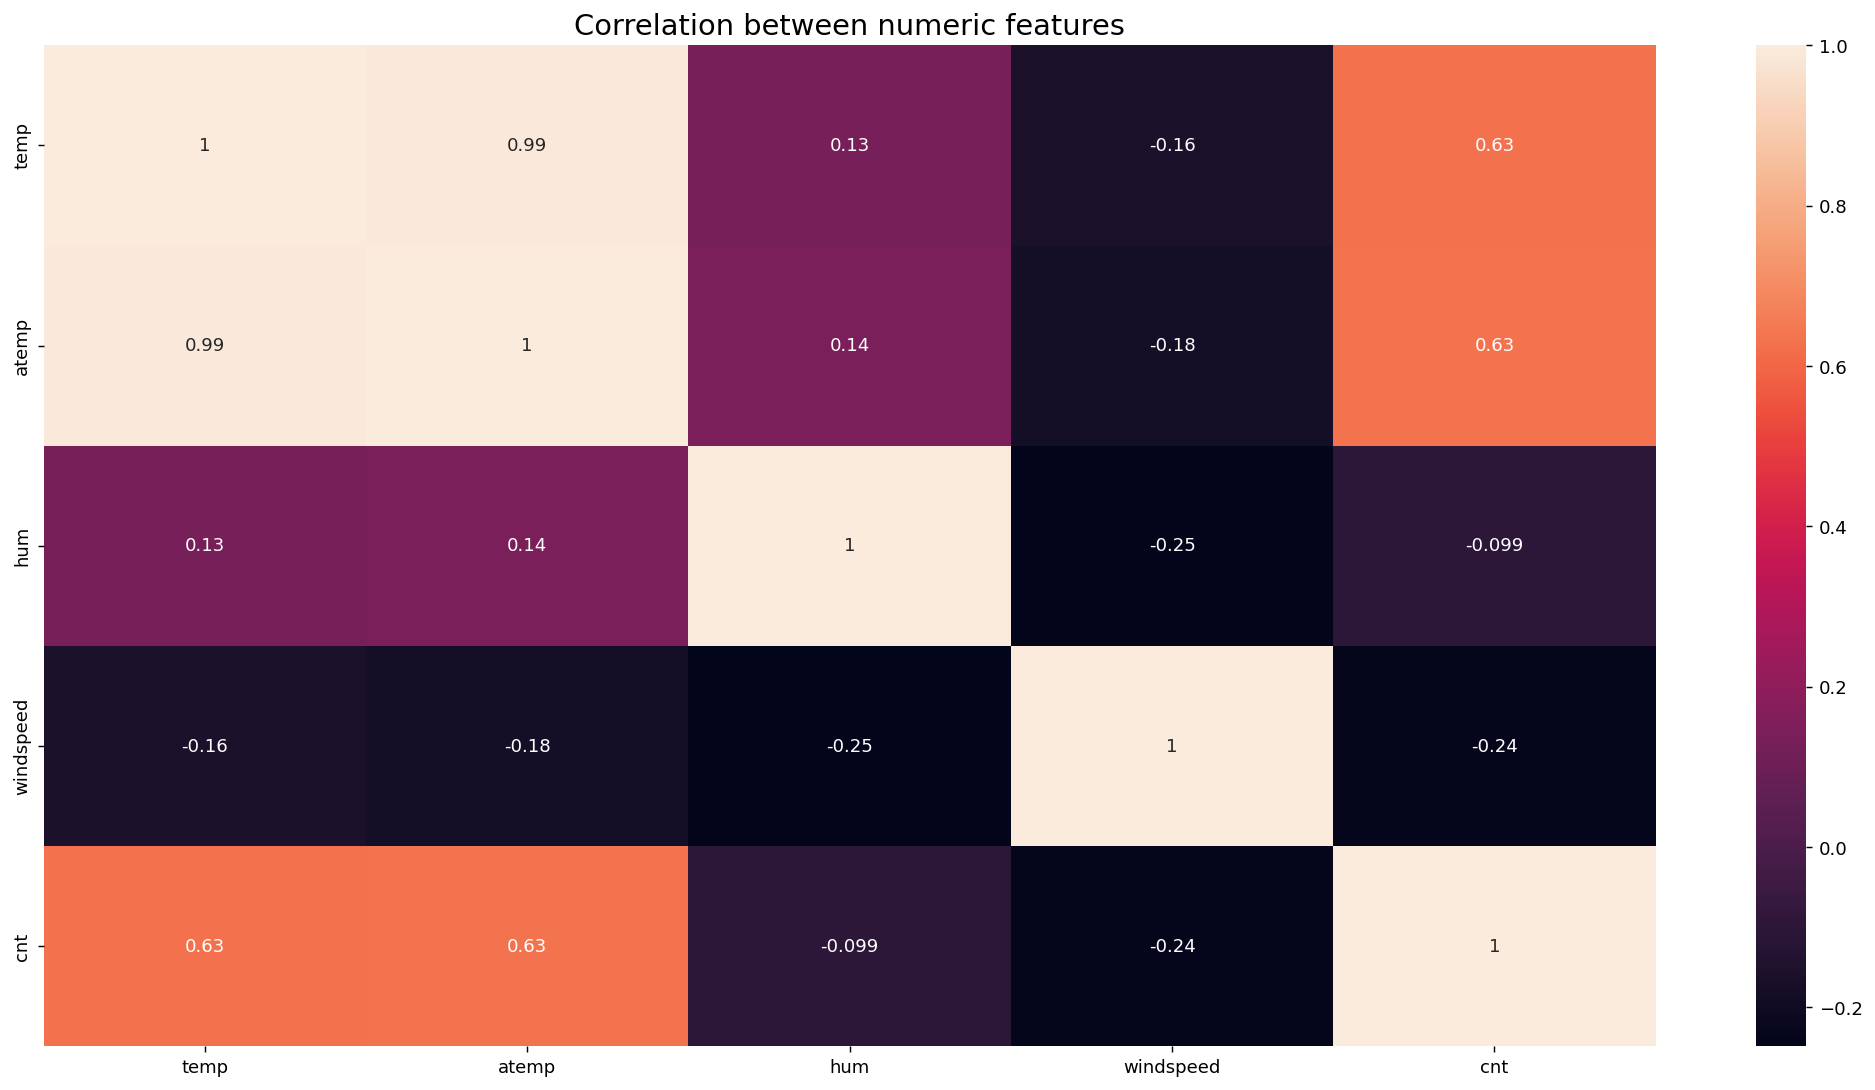

In [26]:
num_features = ["temp","atemp","hum","windspeed","cnt"]
plt.figure(figsize=(20,10),dpi=130)
plt.title("Correlation between numeric features",fontsize=16)
sns.heatmap(df[num_features].corr(),annot= True)
plt.show()

The heatmap above visualizes the correlation between the selected numeric features (temp, atemp, hum, windspeed, cnt) in the dataset.

# SK Learn pacakges import

In [27]:
#import sklearn packages
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

# Creating Dummy variables

In [28]:
#We will create dummy variables for the features - 'mnth', 'weekday', 'season' & 'weathersit'
df = pd.get_dummies(data=df,columns=["season","mnth","weekday"],drop_first=True)
df = pd.get_dummies(data=df,columns=["weathersit"])

In [29]:
df.shape

(730, 31)

In [30]:

df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,True,False,...,False,True,False,False,False,False,False,False,False,True
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,True,False,...,False,False,False,False,False,True,False,False,False,True
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,True,False,...,False,False,False,False,False,False,True,False,True,False
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,True,False,...,False,False,False,False,True,False,False,False,True,False
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,True,False,...,False,False,False,False,False,False,False,False,True,False


In [31]:
#y to contain only target variable
y=df.pop('cnt')

#X is all remainign variable also our independent variables
X=df

#Train Test split with 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [32]:
X.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,1,14.110847,18.18125,80.5833,10.749882,True,False,False,...,False,True,False,False,False,False,False,False,False,True
1,0,0,1,14.902598,17.68695,69.6087,16.652113,True,False,False,...,False,False,False,False,False,True,False,False,False,True
2,0,0,1,8.050924,9.47025,43.7273,16.636703,True,False,False,...,False,False,False,False,False,False,True,False,True,False
3,0,0,1,8.200000,10.60610,59.0435,10.739832,True,False,False,...,False,False,False,False,True,False,False,False,True,False
4,0,0,1,9.305237,11.46350,43.6957,12.522300,True,False,False,...,False,False,False,False,False,False,False,False,True,False


In [33]:
# Check shape and size for train and test
print(X_train.shape)
print(X_test.shape)

(511, 30)
(219, 30)


In [34]:
# Scale continuous variables
num_vars = ['temp','atemp','hum','windspeed']

#Use Normalized scaler to scale
scaler = MinMaxScaler()

#Fit and transform training set only
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

In [35]:
X_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.520548,0.027397,0.698630,0.550874,0.526518,0.654174,0.414873
std,0.500067,0.163398,0.459303,0.227231,0.212976,0.143648,0.185619
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354221,0.353207,0.544598,0.281934
50%,1.000000,0.000000,1.000000,0.575304,0.563297,0.659940,0.384732
75%,1.000000,0.000000,1.000000,0.745079,0.698389,0.756977,0.526481
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [36]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
683,1,0,1,0.327133,0.322150,0.639330,0.327101,False,False,True,...,False,False,False,False,False,False,False,False,False,True
645,1,1,0,0.403972,0.404998,0.731215,0.419004,False,False,True,...,False,False,False,False,False,True,False,False,False,True
163,0,0,1,0.717562,0.685963,0.509660,0.708724,False,True,False,...,False,False,False,False,False,False,True,False,True,False
360,0,0,1,0.331287,0.326273,0.785745,0.415925,True,False,False,...,False,False,False,False,True,False,False,False,False,True
640,1,0,1,0.745598,0.682653,0.817947,0.110593,False,False,True,...,False,False,False,False,True,False,False,False,False,True


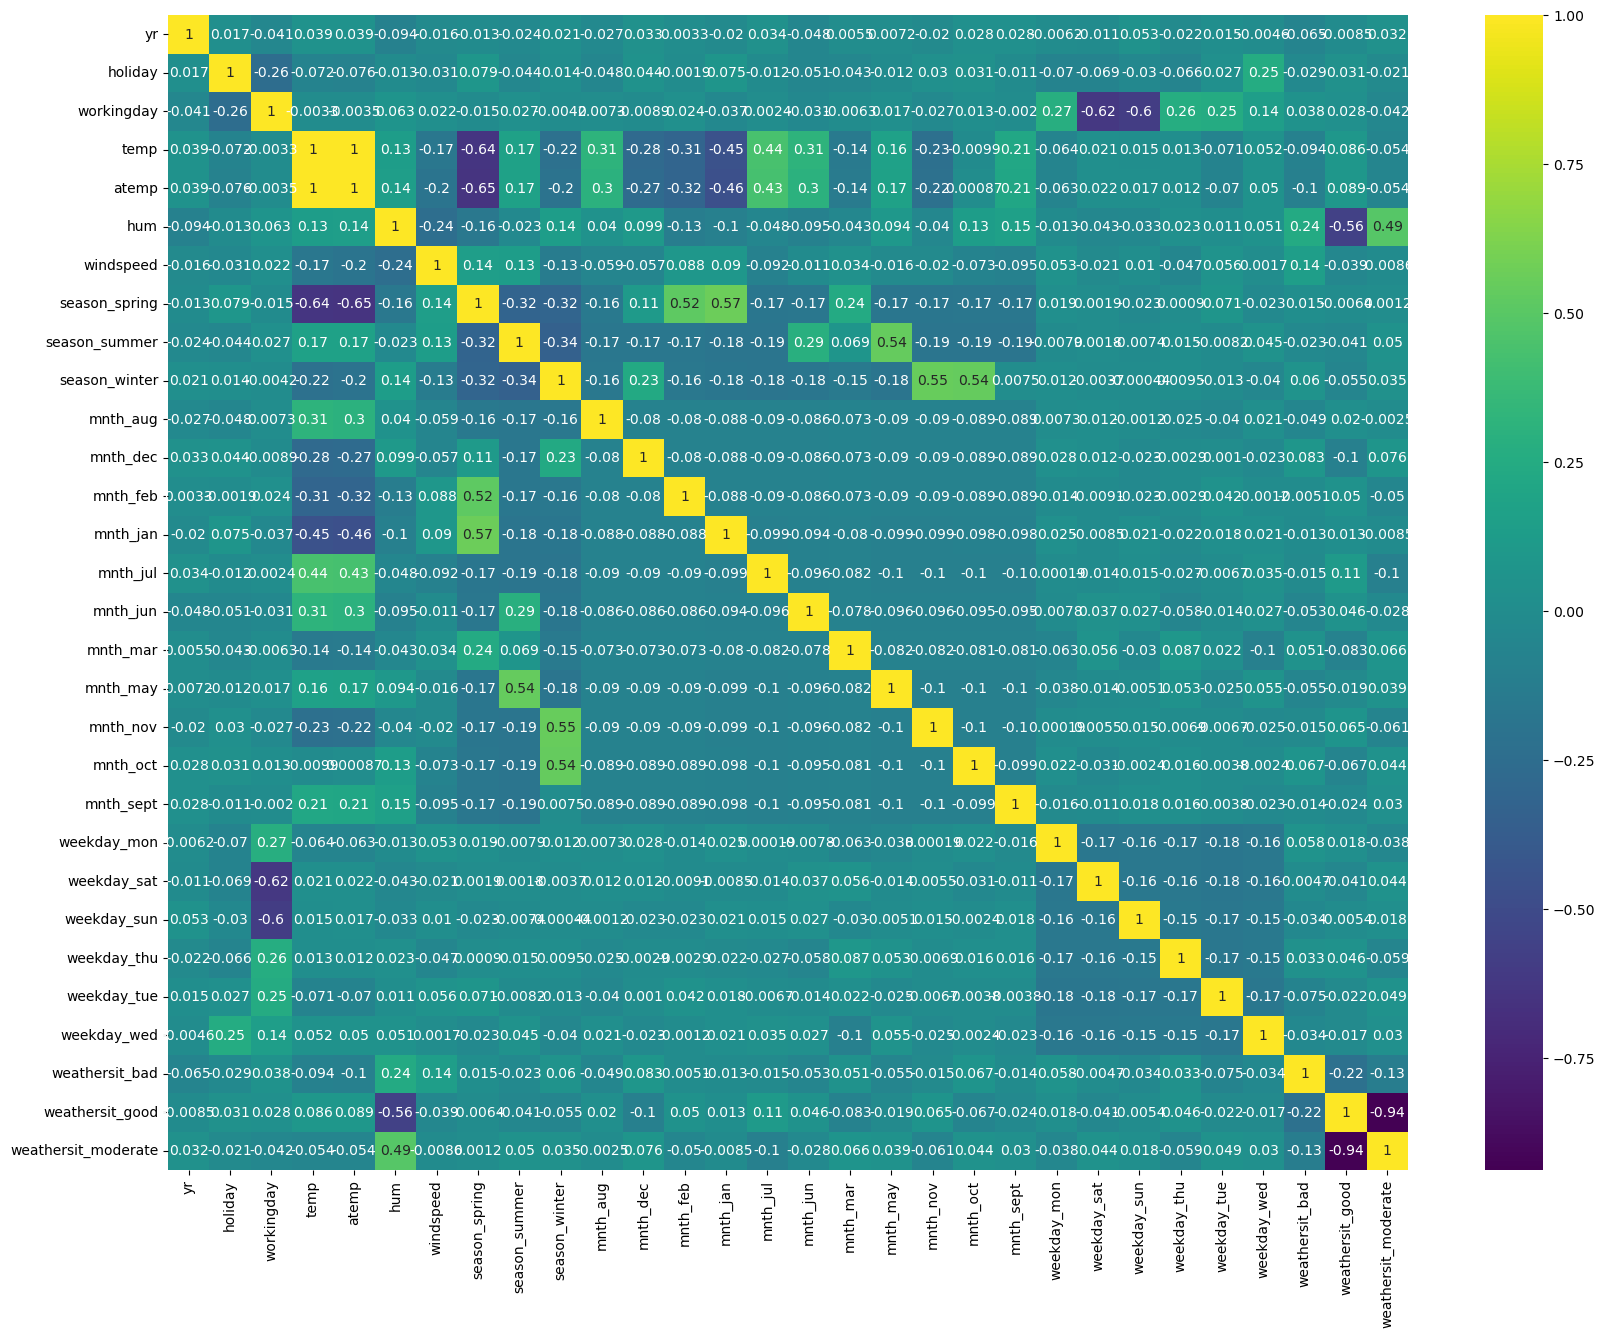

In [37]:
#Check if variables are highly correlated
plt.figure(figsize = (20,15))
sns.heatmap(X_train.corr(), annot = True, cmap="viridis")
plt.show()

# Linear Regression Model

In [49]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [45]:
rfe = RFE(estimator=LinearRegression(), n_features_to_select=15)
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [46]:
RFE(estimator=LinearRegression(), n_features_to_select=15)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [48]:
#Check the Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 13),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 8),
 ('season_winter', True, 1),
 ('mnth_aug', False, 12),
 ('mnth_dec', True, 1),
 ('mnth_feb', False, 9),
 ('mnth_jan', False, 15),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 10),
 ('mnth_mar', True, 1),
 ('mnth_may', False, 2),
 ('mnth_nov', True, 1),
 ('mnth_oct', False, 4),
 ('mnth_sept', True, 1),
 ('weekday_mon', False, 5),
 ('weekday_sat', False, 14),
 ('weekday_sun', False, 11),
 ('weekday_thu', False, 16),
 ('weekday_tue', False, 7),
 ('weekday_wed', False, 6),
 ('weathersit_bad', True, 1),
 ('weathersit_good', True, 1),
 ('weathersit_moderate', False, 3)]

In [50]:
#Function to build a model using statsmodel api
def build_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train.astype(float), X_train_sm.astype(float)).fit()
    print(lm.summary())
    return lm

In [51]:
#Function to calculate VIFs and print them -Takes the columns for which VIF to be calcualted as a parameter
def get_vif(cols):
    df1 = X_train[cols].astype(float)
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [52]:
#Print Columns selected by RFE. Let us manually eliminate for these columns
X_train.columns[rfe.support_]

Index(['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'mnth_dec', 'mnth_jul', 'mnth_mar', 'mnth_nov',
       'mnth_sept', 'weathersit_bad', 'weathersit_good'],
      dtype='object')

In [53]:
# Take columns supported by RFE for regression
X_train_rfe = X_train[['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']]

# Model - 1

In [54]:
# Model 1 are columns selected by RFE
cols = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     165.0
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          1.70e-181
Time:                        15:54:40   Log-Likelihood:                -4134.9
No. Observations:                 511   AIC:                             8302.
Df Residuals:                     495   BIC:                             8370.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2809.2461    

# Model - 2

In [55]:
# Let us drop the variable mnth_jan as it has negative coefficient and is insignificant as it has high p-value
cols = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     177.1
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          1.35e-182
Time:                        15:55:12   Log-Likelihood:                -4135.0
No. Observations:                 511   AIC:                             8300.
Df Residuals:                     496   BIC:                             8363.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2792.2799    

# Model -3

In [57]:
# Let us drop the variable hum as it has negative coefficient and is insignificant as it has high p-value
cols = ['yr', 'holiday', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     183.6
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          3.37e-180
Time:                        15:55:38   Log-Likelihood:                -4143.4
No. Observations:                 511   AIC:                             8315.
Df Residuals:                     497   BIC:                             8374.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2004.0762    

# Model - 4

In [58]:
# Let us drop the variable holiday as it has negative coefficient and is insignificant as it has high p-value
cols = ['yr', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     193.1
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          1.51e-178
Time:                        15:56:14   Log-Likelihood:                -4150.1
No. Observations:                 511   AIC:                             8326.
Df Residuals:                     498   BIC:                             8381.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1845.8415    

# Model - 5 

In [61]:
## Let us replace July with spring as both were highly correlated
#removing of working_day,Summer and adding temp
cols5 = ['yr','season_spring', 'mnth_jul',
        'season_winter', 'mnth_sept', 'weekday_sun',
       'weathersit_bad', 'weathersit_moderate','temp']
build_model(cols5)
get_vif(cols5)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     246.5
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          9.73e-178
Time:                        15:57:05   Log-Likelihood:                -4160.4
No. Observations:                 511   AIC:                             8341.
Df Residuals:                     501   BIC:                             8383.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1740.7372    

In [62]:
#Build a model with all columns to select features automatically
def build_model_sk(X,y):
    lr1 = LinearRegression()
    lr1.fit(X,y)
    return lr1

In [63]:
#Build a model with above columns
lr = build_model_sk(X_train[cols6],y_train)
print(lr.intercept_,lr.coef_)

1740.737244016429 [ 1994.67955569 -1167.70089558  -514.63181313   496.75430396
   465.92729708   190.37518346 -2256.10482681  -662.38986442
  3984.25555511]


In [64]:
y_train_pred = lr.predict(X_train[cols5])

# R- Square value

In [65]:
#Print R-squared Value
r2_score(y_train,y_train_pred)

0.8158045196281631

In [66]:
#Scale variables in X_test
num_vars = ['temp','atemp','hum','windspeed']

#Test data to be transformed only, no fitting
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [67]:
cols5 = ['yr','season_spring', 'mnth_jul',
        'season_winter', 'mnth_sept', 'weekday_sun',
       'weathersit_bad', 'weathersit_moderate','temp']

#Predicting test data values
y_test_pred = lr.predict(X_test[cols5])

# R - square value for Test

In [ ]:
# Find out the R squared value between test and predicted test data sets.  
r2_score(y_test,y_test_pred)

# Final Model approach

In [69]:
#Let us rebuild the final model of manual + rfe approach using statsmodel to interpret it
cols5 = ['yr','season_spring', 'mnth_jul',
        'season_winter', 'mnth_sept', 'weekday_sun',
       'weathersit_bad', 'weathersit_moderate','temp']

lm = build_model(cols5)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     246.5
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          9.73e-178
Time:                        16:04:15   Log-Likelihood:                -4160.4
No. Observations:                 511   AIC:                             8341.
Df Residuals:                     501   BIC:                             8383.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1740.7372    

# Conclusion 
An R-Squared value of 0.8159 on the test data indicates that the model is a strong predictor, capturing 81.59% of the variance. This accuracy can be further enhanced with other regression techniques. Analysis shows that on hot days, bike availability should be increased due to higher booking likelihood. Conversely, bookings decrease on bad weather days, such as snowy or rainy periods. To counteract this, the company could offer promotions to attract customers and boost bookings during adverse weather